#GRIP Task 1: Prediction using Supervised ML
###Name: SOUGATA KHAN
We have to predict the percentage of an student based on the no. of study hours.


###**Importing libraries and visualising the data**


In [30]:
#Installing the necessary libraries
install.packages('Metrics')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [31]:

#Importing the necessary libraries
library(Metrics)

In [32]:
#Reading the dataset
reg_data<-read.csv('http://bit.ly/w-data')
dim(reg_data)
names(reg_data)

[1] 25  2

[1] "Hours"  "Scores"

In [33]:
#A brief preview of the dataset
head(reg_data)

,Hours,Scores
,<dbl>,<int>
1,2.5,21
2,5.1,47
3,3.2,27
4,8.5,75
5,3.5,30
6,1.5,20


Now we plot the data points on a graph to check if there's any visible correlation between the variables.

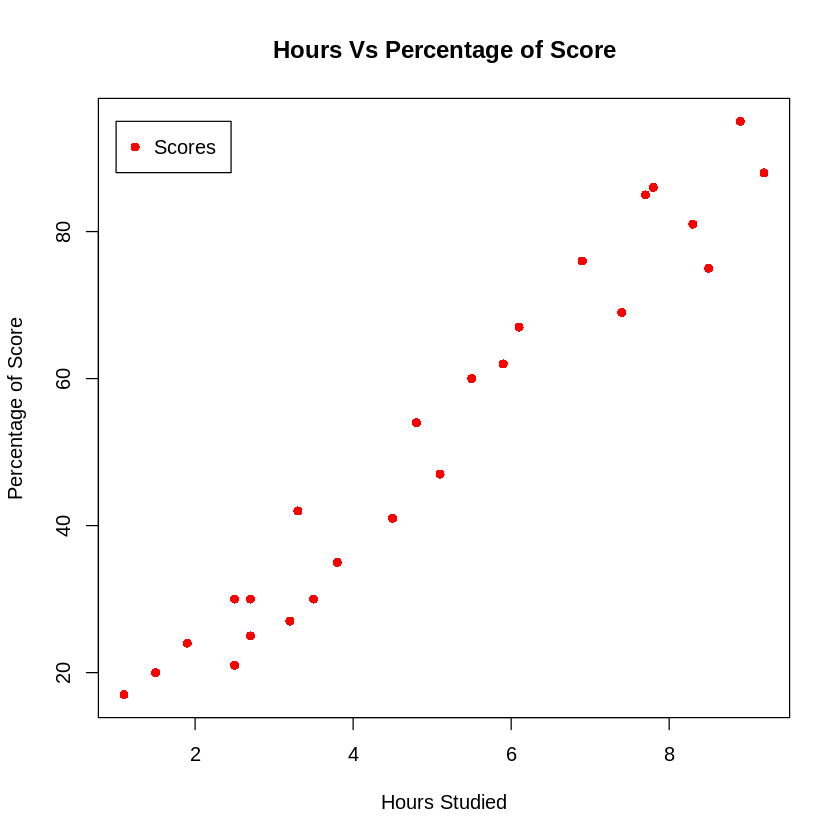

In [34]:
plot(reg_data,main="Hours Vs Percentage of Score",xlab="Hours Studied",ylab="Percentage of Score",pch=16,col="Red")
legend(x=1,y=95,'Scores',pch=16,col='Red')

We see that there is a positive linear relationship between hours and percentage of score


###**Preparing the data**

In [35]:
set.seed(0)
split<-sample(2,nrow(reg_data),replace=T,prob=c(0.7,0.3))
train<-reg_data[split==1,]
test<-reg_data[split==2,]

Then, we split our data into training and test sets. We do this using the sample() method in R.

###**Training the Algorithm**

In [36]:
lmodel<-lm(Scores~Hours,data=train)
summary(lmodel)


Call:
lm(formula = Scores ~ Hours, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.4004 -4.9187  0.4484  4.1205  8.2785 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.2990     3.4673   0.951    0.358    
Hours         9.5413     0.6219  15.341 3.78e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.071 on 14 degrees of freedom
Multiple R-squared:  0.9439,	Adjusted R-squared:  0.9398 
F-statistic: 235.4 on 1 and 14 DF,  p-value: 3.778e-10


*   Residual is the difference between the observed value and the predicted value from the regression model. From the summary we can say the minimum residual is -9.4004 , the median residual is 0.4484 and the max residual was 8.2785 
*   We can use these coefficients to form the following estimated regression equation: Scores = 3.2990+ 9.5413xHours
*   The p-value that corresponds to the t-statistic for the predictor variable "Hours" is 3.78xe^-10 This value is less than level alpha = 0.05, so the predictor variable is statistically significant.

###**Plotting the regression line**

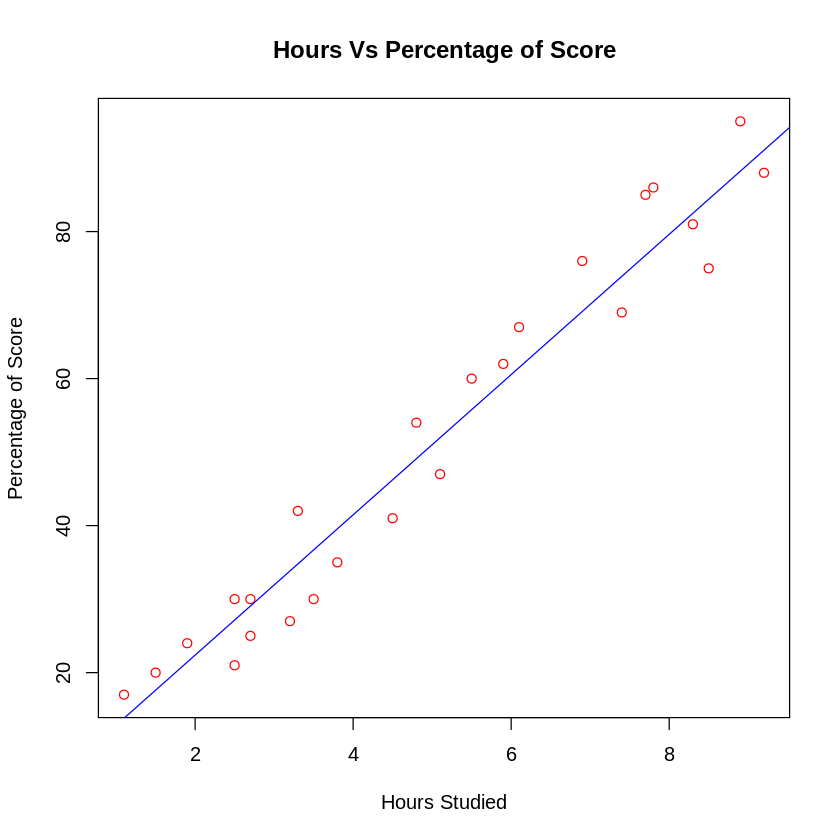

In [37]:
plot(reg_data,main="Hours Vs Percentage of Score",xlab="Hours Studied",ylab="Percentage of Score",col="Red")
abline(lmodel,col="blue")

###**Making Predictions**

In [38]:
test$Predicted_Score= predict(lmodel,newdata = test)
test

,Hours,Scores,Predicted_Score
,<dbl>,<int>,<dbl>
1,2.5,21,27.15238
5,3.5,30,36.69372
7,9.2,88,91.07936
8,5.5,60,55.77640
16,8.9,95,88.21696
18,1.9,24,21.42758
19,6.1,67,61.50121
21,2.7,30,29.06065
22,4.8,54,49.09747


**Predicting the score of a student who studied for 9.25 hours/day:**

In [39]:
predict(lmodel, data.frame(Hours = 9.25))

1 
91.55643

So, a student can get 91.55 on an average if he/she studies 9.25 hours/day.

###**Evaluating the model**

In [40]:
rmse(train$Scores,predict(lmodel,train))

[1] 5.678669

The prediction error RMSE (Root Mean Squared Error), representing the average difference between the observed known
outcome values in the data and the predicted outcome values by the model. The lower the RMSE, the better the model. The
prediction error RMSE is 5.678669